# Group Writeup
Anzhelika Belozerova (238852),
Isabella Urbano-Trujillo (233239),
Camilo Pedraza Jimenez (226679),
Luis Fernando Ramirez Ruiz (222819),
Milton Mier (223594)

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 1.Context 

What is the context? Refine the setup you proposed in the project memo and explain it in a paragraph.

## 2. EDA

What are some of the most important patterns in your data that you can observe through exploratory data analysis? For instance, what does the label look like? What do the simple bivariate relationships in the data look like? Will this affect any of your modeling choices

In [111]:
df = pd.read_csv('/Users/isdc/Library/CloudStorage/OneDrive-HertieSchool/2024-1/Machine Learning/ML project/dates_cleaned.csv', index_col=0)

In [112]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [113]:
print(df)

              Date Country  energy_price     biomass          gas  \
0       2015-01-01      CH         44.94  252.200902  1180.283774   
1       2015-01-01      CZ         26.48  135.000000   172.000000   
2       2015-01-01    DK_1         25.02   18.000000   233.000000   
3       2015-01-01    DK_2         27.38   25.000000   304.000000   
4       2015-01-01      EE         27.38  252.200902  1180.283774   
...            ...     ...           ...         ...          ...   
3294775 2023-12-31    SE_2         44.87  252.200902  1180.283774   
3294776 2023-12-31    SE_3         44.87  252.200902  1180.283774   
3294777 2023-12-31    SE_4         44.87  252.200902  1180.283774   
3294778 2023-12-31      SI         33.30  252.200902  1180.283774   
3294779 2023-12-31      SK         35.14  252.200902  1180.283774   

             nuclear  year  month  day  hour  week_number  day_of_week  
0        7185.089448  2015      1    1     0            1            3  
1        2596.000000  201

In [114]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3294780 entries, 0 to 3294779
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Country       object        
 2   energy_price  float64       
 3   biomass       float64       
 4   gas           float64       
 5   nuclear       float64       
 6   year          int64         
 7   month         int64         
 8   day           int64         
 9   hour          int64         
 10  week_number   int64         
 11  day_of_week   int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 326.8+ MB
None


In [115]:
print(df.describe())

                                Date  energy_price       biomass  \
count                        3294780  3.294780e+06  3.294780e+06   
mean   2019-05-11 19:56:08.041812224  7.931905e+01  2.522009e+02   
min              2015-01-01 00:00:00 -5.000000e+02  0.000000e+00   
25%              2017-02-07 07:00:00  3.250000e+01  7.400000e+01   
50%              2019-03-29 04:00:00  4.800000e+01  2.522009e+02   
75%              2021-08-12 00:00:00  7.995000e+01  2.522009e+02   
max              2023-12-31 00:00:00  6.101780e+03  5.368250e+03   
std                              NaN  1.202656e+02  4.890990e+02   

                gas       nuclear          year         month           day  \
count  3.294780e+06  3.294780e+06  3.294780e+06  3.294780e+06  3.294780e+06   
mean   1.180284e+03  7.185089e+03  2.018858e+03  6.528544e+00  1.573202e+01   
min    0.000000e+00  0.000000e+00  2.015000e+03  1.000000e+00  1.000000e+00   
25%    1.770000e+02  7.185089e+03  2.017000e+03  4.000000e+00  8.000000

In [116]:
print(df.isnull().sum())

Date            0
Country         0
energy_price    0
biomass         0
gas             0
nuclear         0
year            0
month           0
day             0
hour            0
week_number     0
day_of_week     0
dtype: int64


### What does the label look like?

In [117]:
df['Year'] = df['Date'].dt.year
annual_avg_price = df.groupby(['Country', 'Year'])['energy_price'].mean().reset_index()
pivot_table = annual_avg_price.pivot(index='Year', columns='Country', values='energy_price')

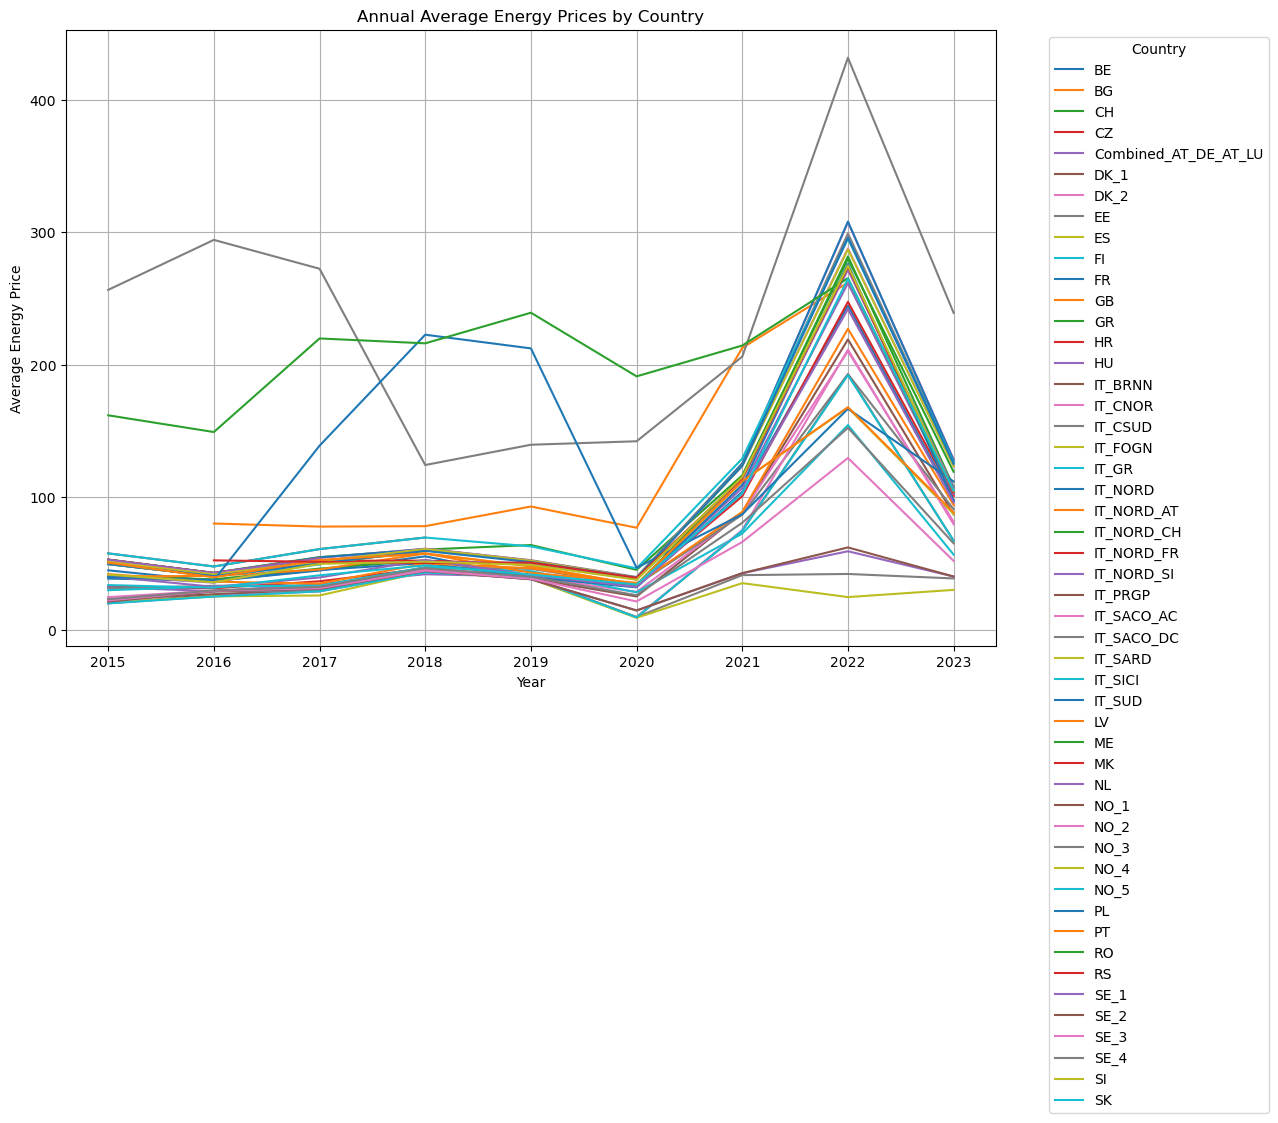

In [118]:
plt.figure(figsize=(12, 8))
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='', label=column)

plt.title('Annual Average Energy Prices by Country')
plt.xlabel('Year')
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [119]:
df_2019 = df[df['Year'] == 2019]
df_2019['Month'] = df_2019['Date'].dt.month
monthly_avg_price_2019 = df_2019.groupby(['Country', 'Month'])['energy_price'].mean().reset_index()
pivot_table_2019 = monthly_avg_price_2019.pivot(index='Month', columns='Country', values='energy_price')

/var/folders/pg/y2y18dgn2sd7c3s0cf9mx1gr0000gn/T/ipykernel_64743/1103834199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Month'] = df_2019['Date'].dt.month


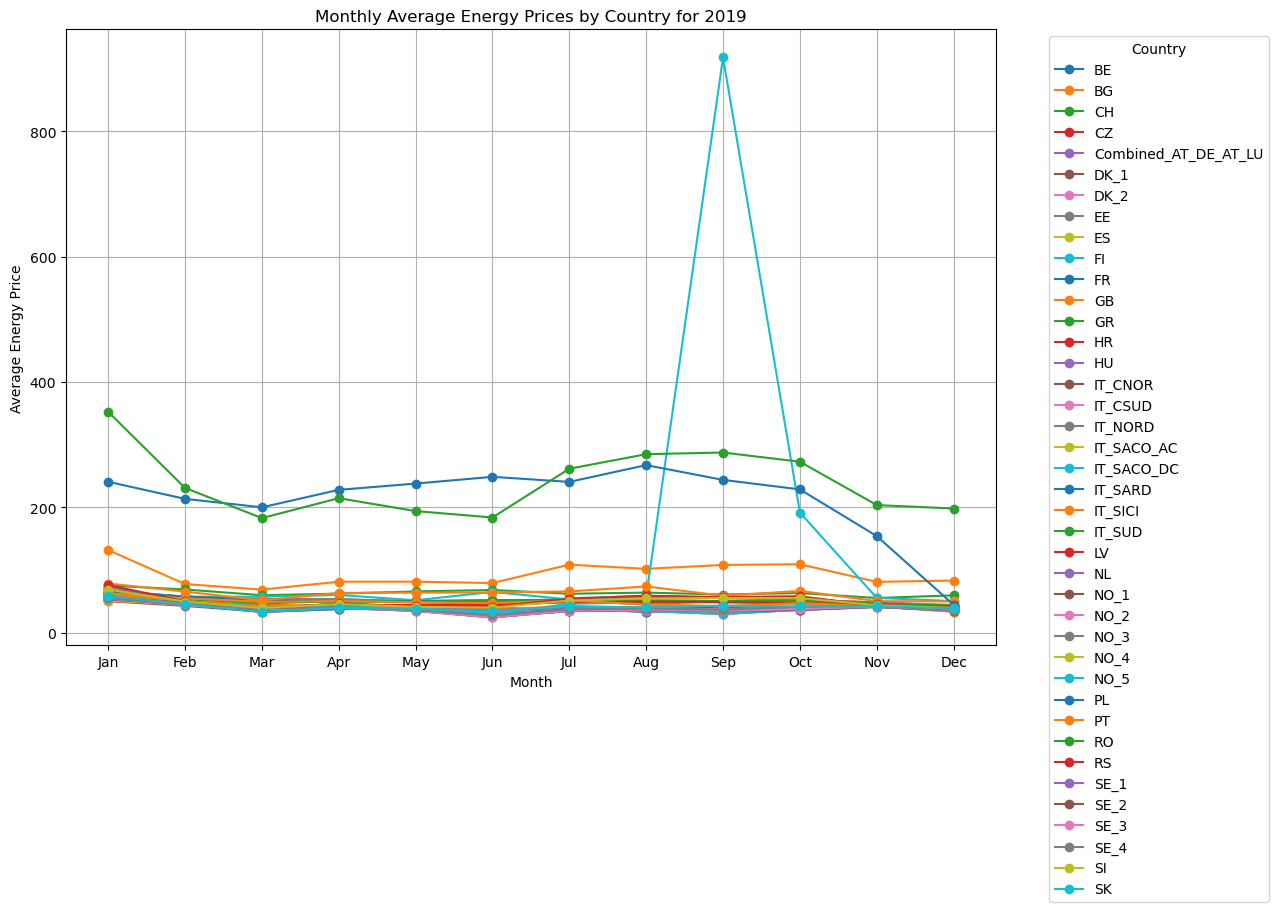

In [120]:
plt.figure(figsize=(12, 8))
for column in pivot_table_2019.columns:
    plt.plot(pivot_table_2019.index, pivot_table_2019[column], marker='o', label=column)

plt.title('Monthly Average Energy Prices by Country for 2019')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [121]:
df_2022 = df[df['Year'] == 2022]
df_2022['Month'] = df_2022['Date'].dt.month
monthly_avg_price_2022 = df_2022.groupby(['Country', 'Month'])['energy_price'].mean().reset_index()
pivot_table_2022 = monthly_avg_price_2022.pivot(index='Month', columns='Country', values='energy_price')

/var/folders/pg/y2y18dgn2sd7c3s0cf9mx1gr0000gn/T/ipykernel_64743/974007566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Month'] = df_2022['Date'].dt.month


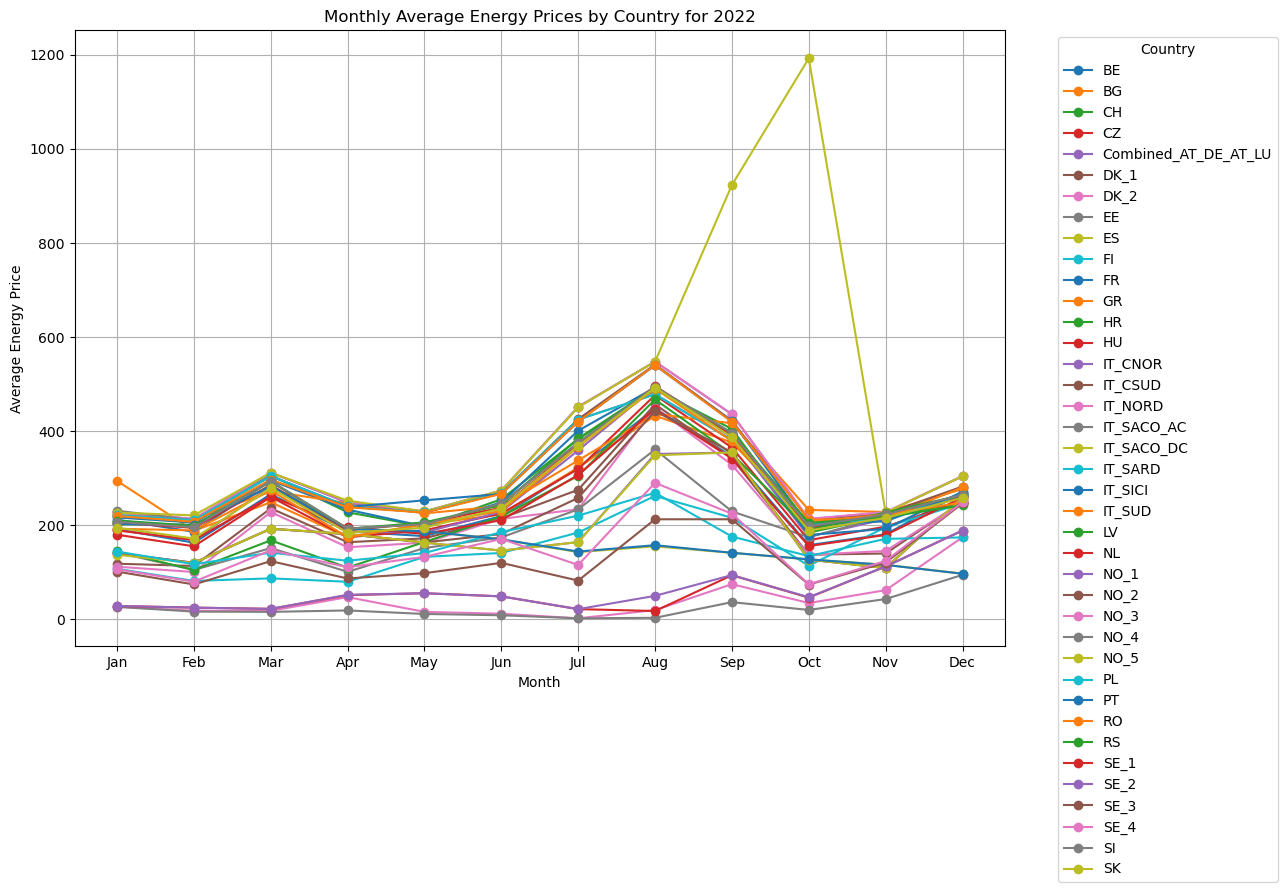

In [122]:
plt.figure(figsize=(12, 8))
for column in pivot_table_2022.columns:
    plt.plot(pivot_table_2022.index, pivot_table_2022[column], marker='o', label=column)

plt.title('Monthly Average Energy Prices by Country for 2022')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [123]:
df_2023 = df[df['Year'] == 2023]
df_2023['Month'] = df_2023['Date'].dt.month
monthly_avg_price_2023 = df_2023.groupby(['Country', 'Month'])['energy_price'].mean().reset_index()
pivot_table_2023 = monthly_avg_price_2023.pivot(index='Month', columns='Country', values='energy_price')

/var/folders/pg/y2y18dgn2sd7c3s0cf9mx1gr0000gn/T/ipykernel_64743/1737050733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Month'] = df_2023['Date'].dt.month


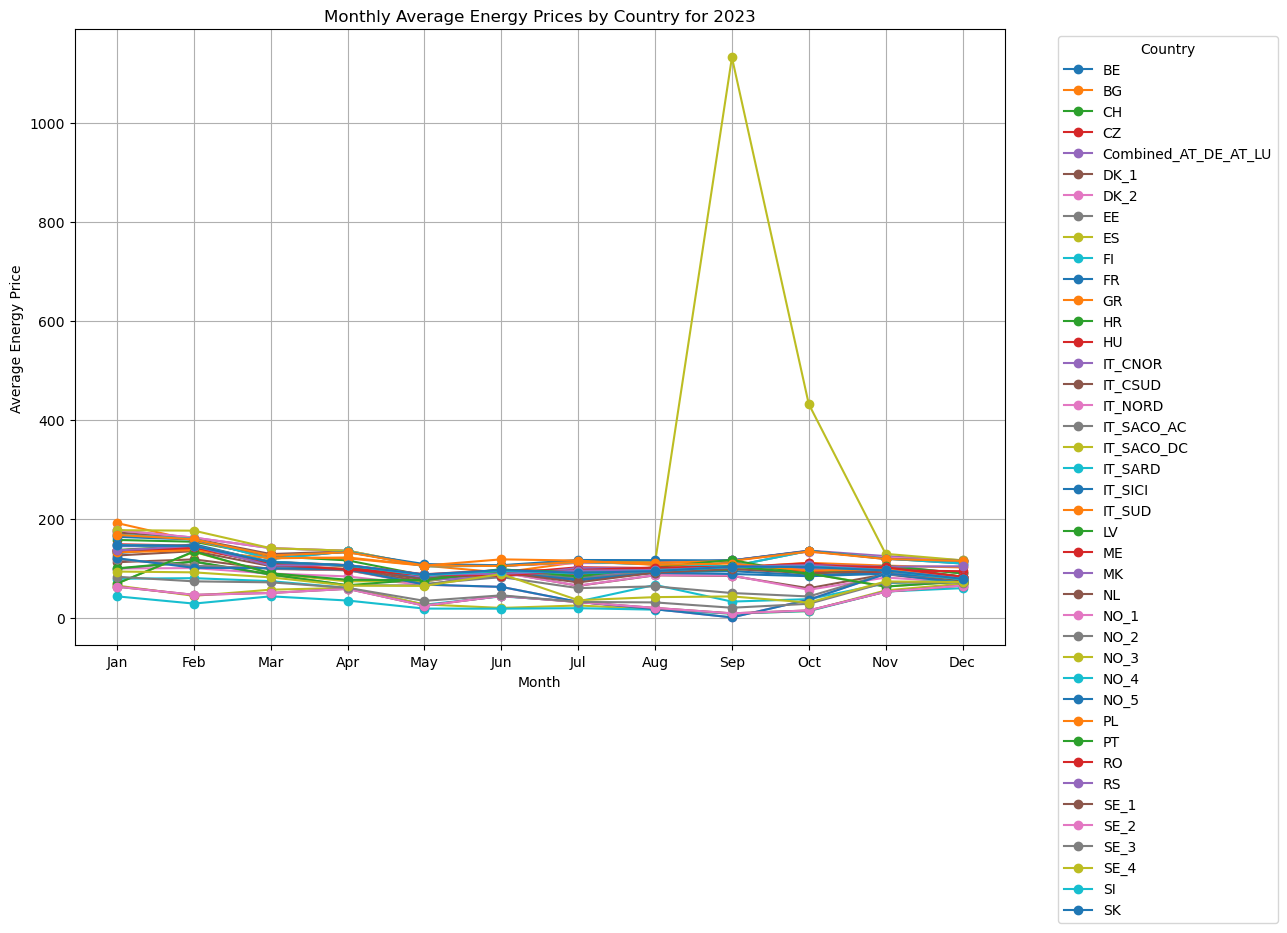

In [124]:
plt.figure(figsize=(12, 8))
for column in pivot_table_2023.columns:
    plt.plot(pivot_table_2023.index, pivot_table_2023[column], marker='o', label=column)

plt.title('Monthly Average Energy Prices by Country for 2023')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Energy Price')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Time series analysis

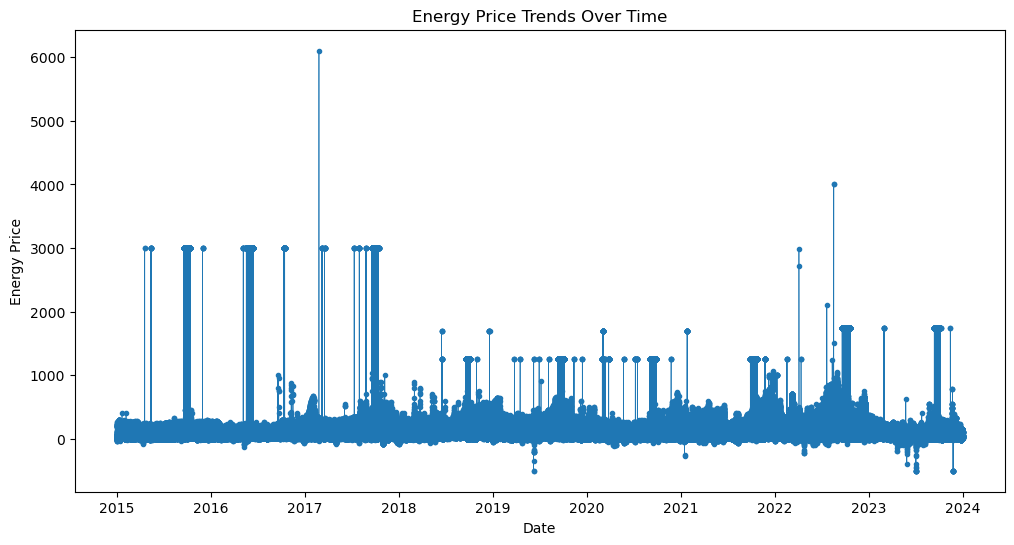

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['energy_price'], marker='.', linestyle='-', linewidth=0.5)
plt.title('Energy Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.show()


### Correlation analysis

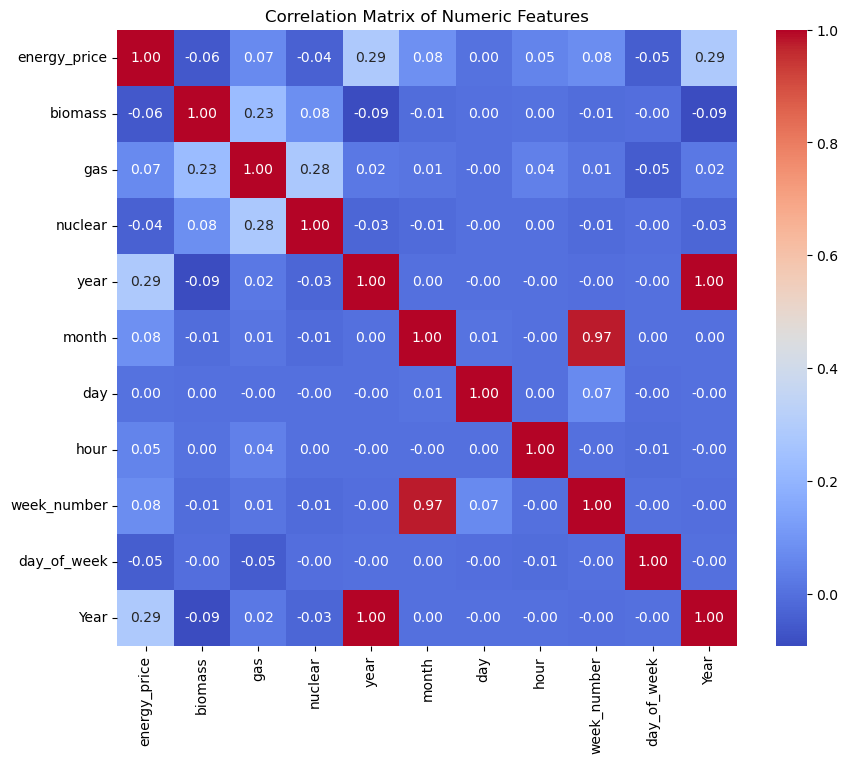

In [126]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


We dropped the Wind vars because of correlation

### Exploring relationship

In [127]:
df_2000 = df[df['energy_price'] <= 2000] # because after 2000 there are outliers

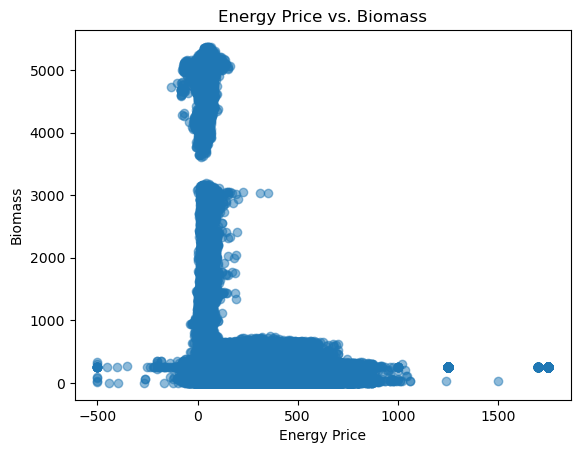

In [128]:
# Relationship target and biomass
plt.scatter(df_2000['energy_price'], df_2000['biomass'], alpha=0.5)
plt.title('Energy Price vs. Biomass')
plt.xlabel('Energy Price')
plt.ylabel('Biomass')
plt.show()

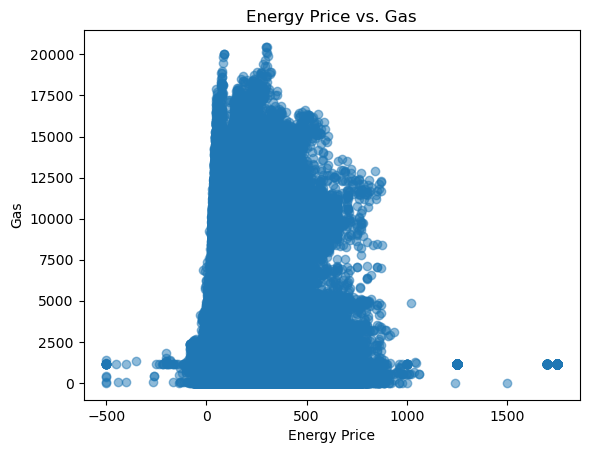

In [129]:
# Relationship target and gas
plt.scatter(df_2000['energy_price'], df_2000['gas'], alpha=0.5)
plt.title('Energy Price vs. Gas')
plt.xlabel('Energy Price')
plt.ylabel('Gas')
plt.show()

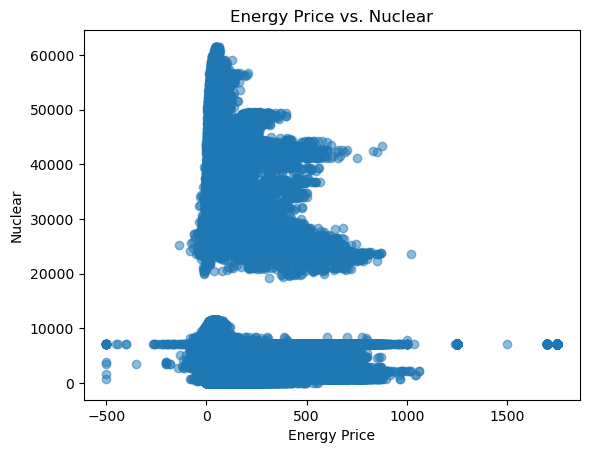

In [130]:
# Relationship target and nuclear
plt.scatter(df_2000['energy_price'], df_2000['nuclear'], alpha=0.5)
plt.title('Energy Price vs. Nuclear')
plt.xlabel('Energy Price')
plt.ylabel('Nuclear')
plt.show()

### Outliers detection

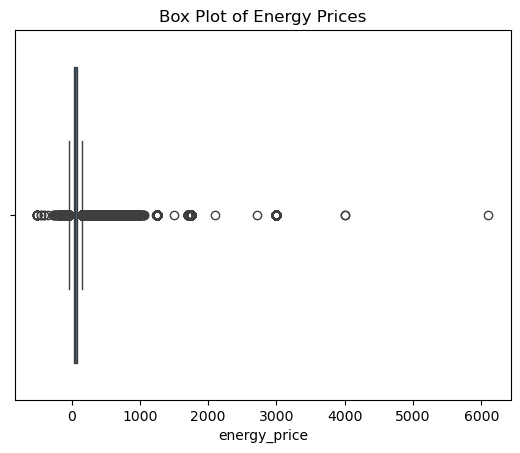

In [131]:
sns.boxplot(x=df['energy_price'])
plt.title('Box Plot of Energy Prices')
plt.show()


### Missing values

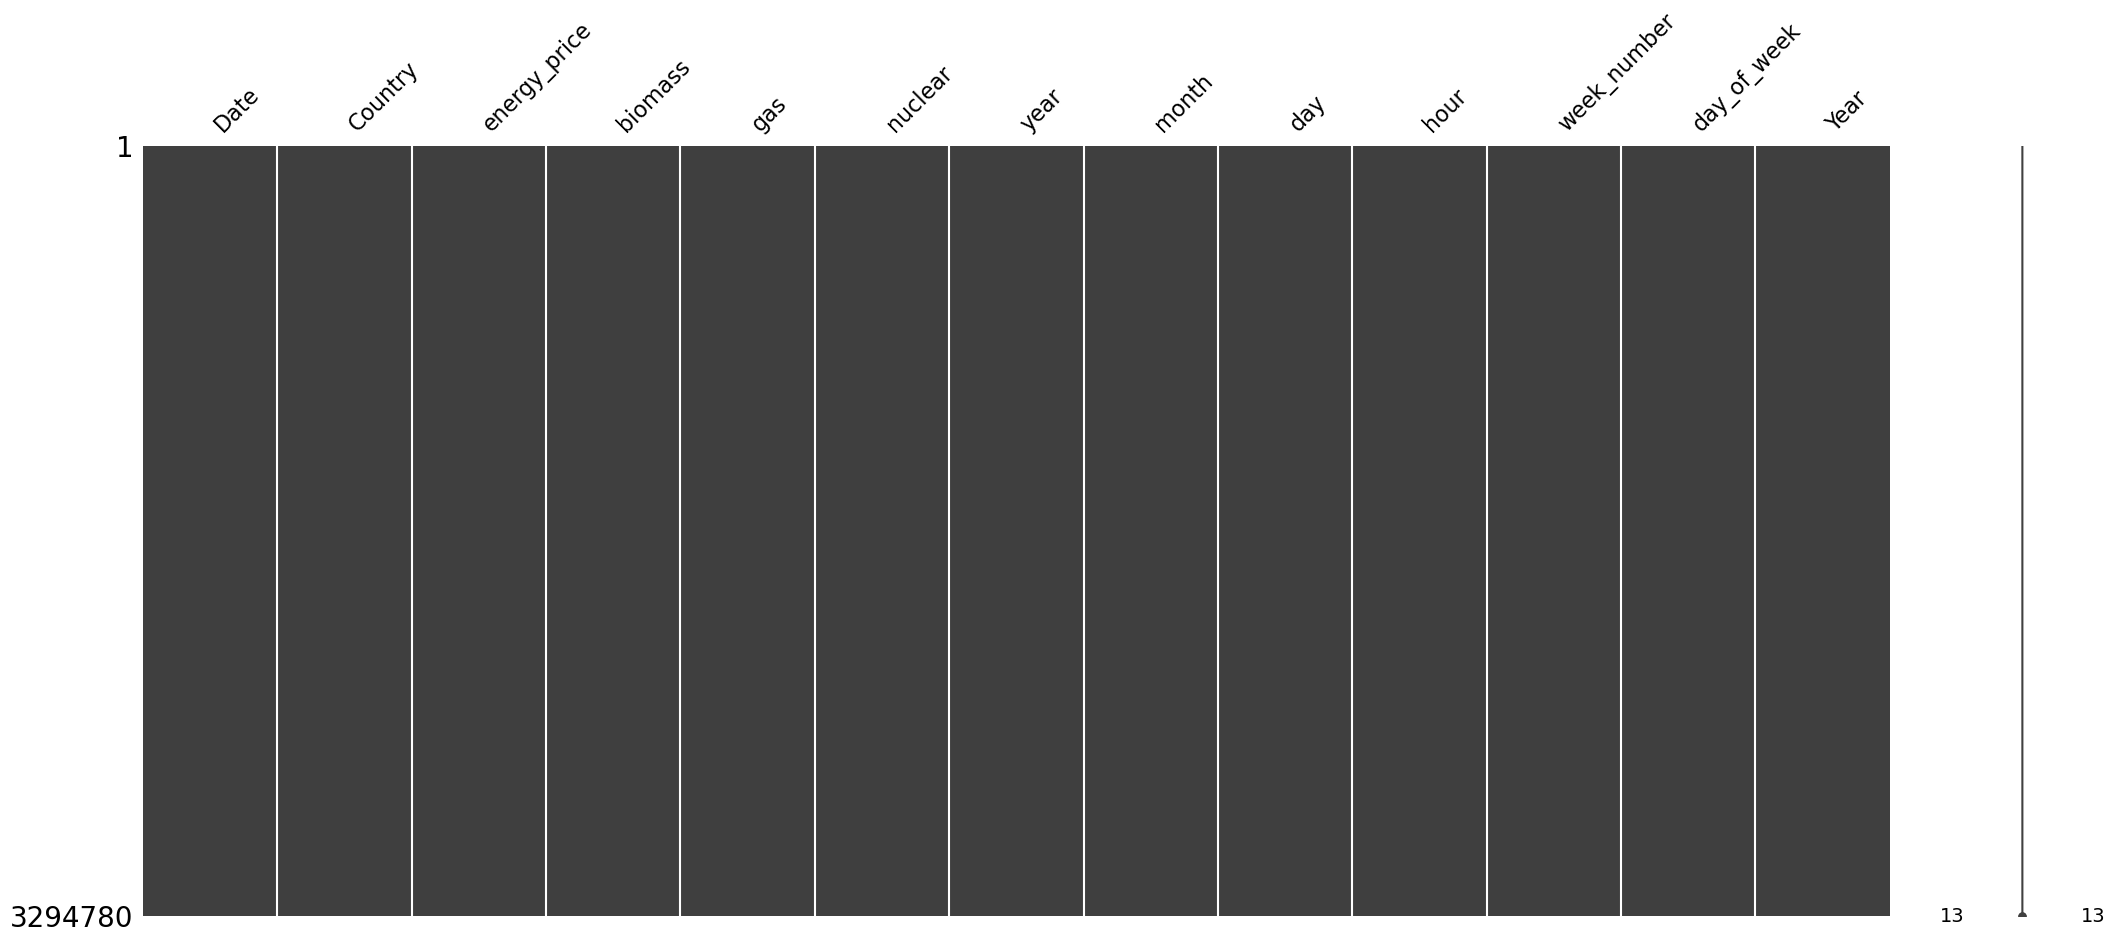

In [132]:
msno.matrix(df)
plt.show()


## 3. Models

What models did you try? How did they perform? I will want to see charts comparing the performance of a few different models. I will also want to see an exploration of which features should be included and proved to be particularly useful.

### Linear regression

Linear Regression is a statistical model that examines the linear relationship between two or more variables — a dependent variable and independent variables. In its simplest form, linear regression uses a single independent variable to predict the values of the dependent variable. We chose it as a first approximation to the problem because it’s a straightforward, easy-to-implement approach and provides a clear interpretation of how variables impact the target (energy prices). It can serve as a baseline to compare more complex models. If more sophisticated models do not perform significantly better than linear regression, the simpler model may be preferred due to its transparency and efficiency.

### ARIMA (Autoregressive Integral Moving Average)

ARIMA is a popular statistical method for time series forecasting that uses data points from previous time steps as input to a regression equation to predict future values. This method combines autoregressive (AR), differencing (I), and moving average (MA) components. We chose it because it's especially useful for data with trends or seasonal patterns, which is typical in energy data. ARIMA is also suitable for univariate series with a reliance on past values, which makes it useful for initial exploration in time series forecasting.

### Random Forest

Random Forest is an ensemble learning method for regression (and classification) that operates by constructing multiple decision trees during training and outputting the average prediction of the individual trees. It is a robust, versatile model that can handle both numerical and categorical data. We chose it because it's capable of capturing complex nonlinear relationships between the dependent and independent variables without extensive data transformation. It also provides insights into which features are most important in predicting the target variable, which can be valuable for understanding energy price dynamics.

### XGBoost (Gradient Boosting Machines)

XGBoost is an implementation of gradient boosting frameworks that are used for building fast and accurate models. It uses tree-based learning algorithms that successively learn from errors of prior trees, improving accuracy incrementally. We chose it because they are known for delivering high performance and prediction accuracy. Also because it is designed to be efficient, scalable, and to work with large datasets such as ours that has over 3 million observations. It is also effective with datasets having numerous missing values or wide variations in feature scale, common in energy datasets.

## 4. Evaluation

How are you doing evaluation of your models? What is your test set? How did you choose it? How are you doing cross-validation or, more generally, choosing hyperparameters?

## 5. Choice of model

The final part of the writeup should be an argument for which model you believe best satisfies the needs of the context. You should buttress this argument with the charts and diagnostics you have prepared. This doesn’t necessarily mean the model with the lowest overall error! It’s entirely plausible that concerns such as fairness or explainability might be important considerations to you, in which case you should discuss the tradeoffs you have measured on these dimensions. Crucially, however, your determination should be backed by evidence.